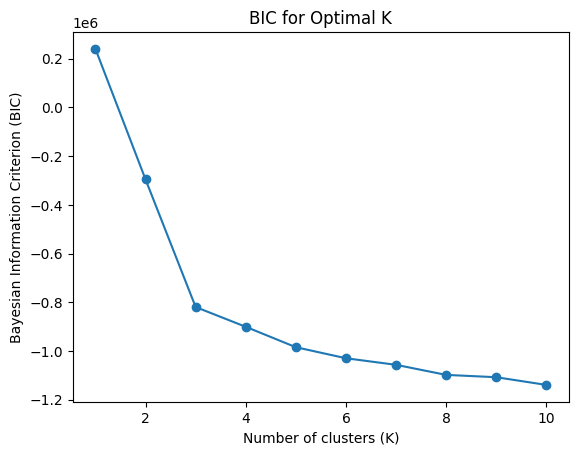

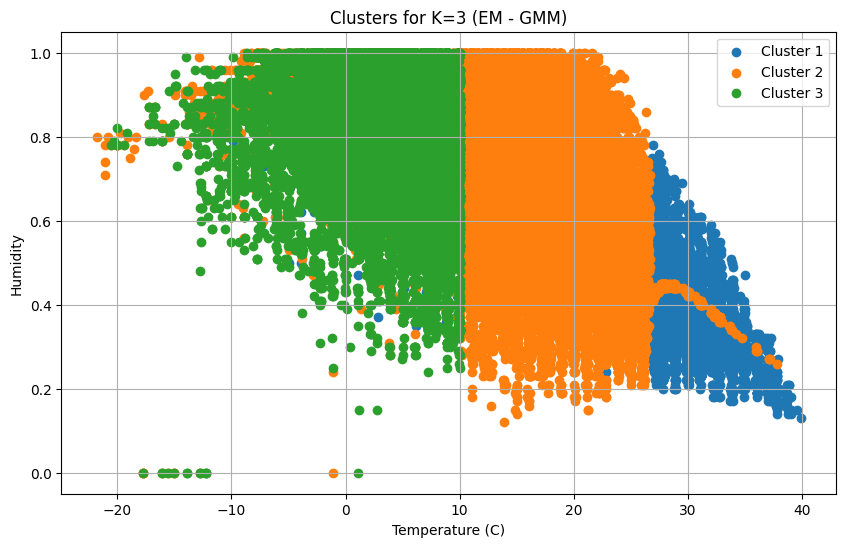

Silhouette Score for K=3: 0.14329947761996045


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv("weatherHistory.csv")

# Selecting all features for clustering
X = data.drop(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply EM clustering for different values of K and calculate SSE
sse = []
max_k = 10
for k in range(1, max_k+1):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    sse.append(gmm.bic(X_scaled))  # Bayesian Information Criterion (BIC) is used as a measure of SSE for GMM

# Plot SSE graph
plt.plot(range(1, max_k+1), sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Bayesian Information Criterion (BIC)')
plt.title('BIC for Optimal K')
plt.show()

# Based on the BIC, let's choose K = 3
k = 3

# Apply EM clustering with chosen K
gmm = GaussianMixture(n_components=k, random_state=42)
gmm.fit(X_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = gmm.predict(X_scaled)

# Plot the clusters for K=3
plt.figure(figsize=(10, 6))

# Plot data points with different colors for each cluster
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Temperature (C)'], cluster_data['Humidity'], label=f'Cluster {cluster+1}')

plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.title('Clusters for K=3 (EM - GMM)')
plt.legend()
plt.grid(True)
plt.show()
